In [145]:
import numpy as np
import math
import matplotlib.pyplot as plt

Define funcition

In [146]:
f = lambda x : pow(x[0],4) + pow(x[1],4) + 4*abs(x[0]-6*x[1]) + 5
lam = lambda n : 1/n  

In [161]:
def f_derivative(x):
    fd1 = [4*pow(x[0],3) + 4, 4*pow(x[0],3) - 24]
    fd2 = [4*pow(x[0],3) - 4, 4*pow(x[0],3) + 24]
    if x[0]>6*x[1]:
        return fd1
    elif x[0]<6*x[1]:
        return fd2
    else:
        return np.mean(np.array([fd1,fd2]), axis=0)

Start values

In [208]:
x = np.array([5.,-5.])
eps = 0.001
max_iter = 1000

In [209]:
def SubMethod(x, eps, m_iter):
    result = [x]
    values = [f(x)]
    n = 0
    while np.linalg.norm(f_derivative(x)) > eps and n < m_iter:
        n += 1
        x = x - f_derivative(x)/(np.sqrt(n)*np.linalg.norm(f_derivative(x)))
        result.append(x)
        values.append(f(x))
    return result,values
    

In [210]:
xy, res = SubMethod(x, eps, max_iter)

In [211]:
for i in xy:
    print("(%2.3f,%2.3f)"%(i[0],i[1]), end=" ")

(5.000,-5.000) (4.273,-5.687) (3.750,-6.163) (3.315,-6.542) (2.927,-6.857) (2.566,-7.121) (2.217,-7.334) (1.868,-7.477) (1.515,-7.502) (1.225,-7.338) (1.046,-7.077) (0.925,-6.801) (0.831,-6.528) (0.754,-6.261) (0.687,-6.002) (0.628,-5.751) (0.575,-5.507) (0.527,-5.269) (0.481,-5.038) (0.439,-4.812) (0.399,-4.592) (0.360,-4.378) (0.323,-4.168) (0.288,-3.962) (0.253,-3.761) (0.220,-3.564) (0.187,-3.370) (0.155,-3.181) (0.124,-2.994) (0.093,-2.811) (0.063,-2.631) (0.034,-2.454) (0.005,-2.279) (-0.024,-2.108) (-0.052,-1.939) (-0.080,-1.772) (-0.107,-1.607) (-0.134,-1.445) (-0.161,-1.285) (-0.187,-1.127) (-0.213,-0.971) (-0.238,-0.817) (-0.263,-0.665) (-0.288,-0.514) (-0.312,-0.366) (-0.336,-0.218) (-0.359,-0.073) (-0.381,0.071) (-0.356,-0.071) (-0.379,0.070) (-0.354,-0.069) (-0.376,0.069) (-0.352,-0.067) (-0.373,0.068) (-0.349,-0.066) (-0.370,0.068) (-0.347,-0.064) (-0.368,0.067) (-0.345,-0.062) (-0.366,0.066) (-0.343,-0.061) (-0.363,0.065) (-0.341,-0.060) (-0.361,0.065) (-0.339,-0.058) (-

In [212]:
for i in res:
    print("%2.3f"%(i), end=",")

1395.000,1537.667,1808.363,2127.452,2465.692,2801.269,3106.432,3330.255,3363.077,3087.471,2687.923,2311.723,1981.199,1695.614,1450.163,1239.602,1059.109,904.458,772.004,658.624,561.643,478.765,408.020,347.709,296.366,252.725,215.687,184.301,157.740,135.287,116.315,100.285,86.726,75.229,65.443,57.063,49.828,43.514,37.933,32.924,28.353,24.110,20.106,16.273,12.555,8.916,5.330,8.257,5.292,8.220,5.257,8.186,5.223,8.153,5.192,8.123,5.162,8.093,5.134,8.066,5.107,8.040,5.081,8.015,5.057,7.991,5.034,7.968,5.014,7.939,5.032,7.883,5.013,7.858,5.031,7.805,5.012,7.787,5.029,7.730,5.012,7.713,5.027,7.668,5.011,7.652,5.026,7.602,5.011,7.588,5.024,7.549,5.010,7.532,5.024,7.495,5.010,7.482,5.022,7.441,5.010,7.429,5.021,7.397,5.010,7.386,5.020,7.349,5.009,7.338,5.020,7.310,5.009,7.299,5.019,7.266,5.009,7.257,5.018,7.231,5.009,7.222,5.017,7.192,5.008,7.183,5.017,7.160,5.008,7.152,5.016,7.124,5.008,7.116,5.016,7.096,5.008,7.088,5.015,7.063,5.008,7.055,5.015,7.036,5.007,7.029,5.014,7.006,5.007,6.999,5.014,

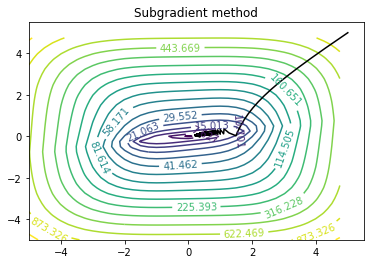

In [207]:
from matplotlib.colors import LogNorm

delta = 0.25
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = (lambda x_, y_: f((x_, y_)))(X, Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm())
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(*zip(*xy), color='k')
ax.set_title('Subgradient method')
plt.show()

In [85]:
#Radius of ball
d = 1
a = [2.0,0.5]
counter_success = 0
counter_defeat = 0
success_max = 5
defeat_max = 10
max_iter = 1000
x = (5,5)
eps = 0.001
def Random(d, a, c_s, c_d, s_m, d_m, eps, x, m_iter):
    result = [np.array(x)]
    values = [f(x)]
    y = np.random.uniform(-10,10,2)
    r = d/np.linalg.norm(y)*y
    while np.linalg.norm(y) > eps and m_iter > 0:
        m_iter -= 1
        #If step is better set new value
        if np.linalg.norm(y) < np.linalg.norm(x):
            x = y
            result.append(x)
            values.append(f(x))
            c_s += 1
        else:
            c_d += 1
        #If defeat or success change step value
        if d_m < c_d:
            c_d = 0
            d *= a[1]
        if c_s > s_m:
            c_s = 0
            d *= a[0]
        y = np.random.uniform(-r,r,2)
        r = d/np.linalg.norm(y)*y
    return result,values
xy, res = Random(d,a,counter_success,counter_defeat,success_max,defeat_max,eps,x, max_iter)
xy

[array([5, 5]),
 array([-0.51305243,  0.47737954]),
 array([ 0.32833125, -0.42989508]),
 array([-0.33795052, -0.38277327]),
 array([-0.17275162,  0.38707768]),
 array([0.00669255, 0.37307003]),
 array([-0.00437608,  0.19116252]),
 array([ 6.83277773e-06, -3.94899060e-02]),
 array([-6.08635820e-05, -1.98014139e-02]),
 array([-1.04014426e-06, -7.92933381e-03]),
 array([-0.00018556, -0.00709844]),
 array([ 8.41351602e-06, -6.47478326e-03]),
 array([ 5.67538685e-06, -4.86814899e-03]),
 array([-1.07400950e-05, -2.42711289e-03]),
 array([0.00018428, 0.00237803]),
 array([0.00166823, 0.00168447]),
 array([-0.00217555,  0.00032088]),
 array([2.16951180e-03, 1.29211993e-07])]

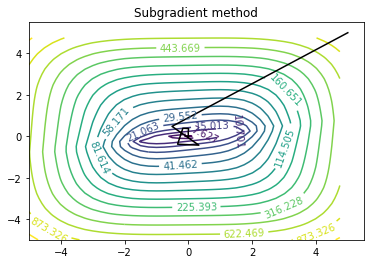

In [86]:
from matplotlib.colors import LogNorm

delta = 0.25
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = (lambda x_, y_: f((x_, y_)))(X, Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm())
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(*zip(*xy), color='k')
ax.set_title('Subgradient method')
plt.show()